In [1]:
'''
load packages
'''
from guide_calling import *

%matplotlib inline  
%load_ext autoreload
%autoreload 2

sns.set_style('white')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from pomegranate import *

#use for wildcard search for files.
import os
from os import listdir
from os.path import isfile, join

In [2]:
##The lane number in the dictionary below must match the GEMGROUP in the aggr table
lanes={1:'/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/diff_1/',
       2:'/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/diff_2/',
       3:'/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/diff_3/',
       4:'/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/diff_4/',
       5:'/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/diff_5/',
       6:'/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/diff_6/'}

rnaseq_barcodes_file='barcodes.tsv.gz'
guide_barcode_reads_file='guide_barcode_reads.txt.gz'

out_dir='/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/sgrna/guide_calls/'

In [3]:
'''
first, update gemgroup on cbc
Organize into cbc/read/UMI count matrix.
'''

for k,v in lanes.items():
    
    # load guide barcode reads from outs/*guide_barcode_reads.txt.gz file in experiment folder
    gbc_reads = pd.read_csv(join(v,guide_barcode_reads_file), sep = '\t', header=None, names=('read_name','guide_identity', 'cell_barcode', 'UMI')).drop('read_name',axis=1)
    
    #correct gemgroup
    gbc_reads['cell_barcode']=gbc_reads['cell_barcode'].str.split('-').str[0]+'-'+str(k)
    
    #load rnaseq cell barcodes
    cell_barcodes = pd.read_csv(join(v,rnaseq_barcodes_file), sep='\t', header=None, names=['cell_barcode'])
    cell_barcodes['cell_barcode']=cell_barcodes['cell_barcode'].str.split('-').str[0]+'-'+str(k)
    
    #remove unmapped reads
    #this is a conservative step - in some cases, these unmapped reads represent real UMIs/CBCs but fail to map
    gbc_reads=gbc_reads[gbc_reads['guide_identity']!='*']
    print "shape before CBC"
    print gbc_reads.shape
    gbc_reads=gbc_reads.sample(n=150407893)
    print "shape after downsample"
    print gbc_reads.shape
    #collect reads that come from valid cell barcodes as determined by RNAseq
    captured_gbc_table = capture_reads(gbc_reads, cell_barcodes)
    print "shape after CBC"
    print captured_gbc_table.shape
    captured_gbc_table.to_csv(v+'gemgroup'+str(k)+'.guide_barcode_reads.valid.txt', header=True)


'\nfirst, update gemgroup on cbc\nOrganize into cbc/read/UMI count matrix.\n'

shape before CBC
(161714084, 3)
shape after downsample
(150407893, 3)
Filtering by cell barcode...
shape after CBC
(267480, 4)
shape before CBC
(165067017, 3)
shape after downsample
(150407893, 3)
Filtering by cell barcode...
shape after CBC
(277173, 4)
shape before CBC
(154976088, 3)
shape after downsample
(150407893, 3)
Filtering by cell barcode...
shape after CBC
(271225, 4)
shape before CBC
(154790475, 3)
shape after downsample
(150407893, 3)
Filtering by cell barcode...
shape after CBC
(260338, 4)
shape before CBC
(161747060, 3)
shape after downsample
(150407893, 3)
Filtering by cell barcode...
shape after CBC
(273834, 4)
shape before CBC
(158456055, 3)
shape after downsample
(150407893, 3)
Filtering by cell barcode...
shape after CBC
(281364, 4)


In [4]:
'''
Merge all gemgroups.
'''
pop=pd.DataFrame()
captured_gbc_table=pd.DataFrame()

for k,v in lanes.items():
    #load captured_gbc_table
    gbcfile = [f for f in listdir(v) if isfile(join(v, f)) if '.guide_barcode_reads.valid.txt' in f]
    captured_gbc_table=captured_gbc_table.append(pd.read_csv(join(v,gbcfile[0]), sep=',',header=0)) # edit read_csv


'\nMerge all gemgroups.\n'

In [5]:
captured_gbc_table.groupby('guide_identity').count().sort_values('cell_barcode')

,cell_barcode,read_count,UMI_count,coverage,gemgroup
guide_identity,,,,,
sgLH17063_2,8,8,8,8,8
sgLH01249_1,22,22,22,22,22
sgLH13860_2,140,140,140,140,140
sgLH11064_2,185,185,185,185,185
sgLH01249_2,203,203,203,203,203
sgLH08564_1,214,214,214,214,214
sgZC3H10_1,234,234,234,234,234
sgLH04660_2,240,240,240,240,240
sgLH11610_1,272,272,272,272,272


In [6]:
#low_count=captured_gbc_table[captured_gbc_table['guide_identity'].isin(['sgLH17063_2','sgLH01249_1'])].index
#captured_gbc_table=captured_gbc_table.drop(low_count,axis=0)

In [7]:
'''
Perform guide calling.
'''
for guide in captured_gbc_table['guide_identity'].unique():
    pop=pop.append(MixedModelCall(guide,captured_gbc_table,"diff",out_dir))

'\nPerform guide calling.\n'

,cell_barcode
guide_identity,
sgLH17063_2,2
sgLH01249_1,3
sgLH11610_1,15
sgLH08564_1,25
sgLH08564_2,29
sgLH17063_1,43
sgLH01001_2,46
sgLH11064_2,55
sgLH03635_1,60


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c87bebd0>]],
      dtype=object)

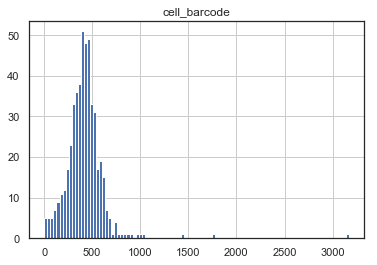

In [8]:
pop[['guide_identity','cell_barcode']].groupby('guide_identity').count().sort_values('cell_barcode').head(20)
pop[['guide_identity','cell_barcode']].groupby('guide_identity').count().sort_values('cell_barcode').hist(bins=100)

In [9]:
pop[['guide_identity','cell_barcode']].groupby('guide_identity').count().describe()


,cell_barcode
count,492.00
mean,414.51
std,212.30
min,2.00
25%,315.00
50%,406.00
75%,495.00
max,3167.00


In [10]:
pop['guide_identity'].drop_duplicates().shape

(492,)

In [11]:
pop['good_coverage']=np.nan
pop['number_of_cells']=np.nan

In [12]:
pop.to_csv(out_dir+'diff_cell_identities.csv',header=True,index=False)
pop.to_csv('/media/data4/shared/ipsc_manuscript/analysis/perturbseq/input/guide_calls/diff_cell_identities.csv',header=True,index=False)



In [13]:
pop[['guide_identity','UMI_count']].groupby('guide_identity').median().sort_values('UMI_count').head(10)
pop[['guide_identity','UMI_count']].groupby('guide_identity').min().sort_values('UMI_count').head(10)


,UMI_count
guide_identity,
sgLH11064_2,3.00
sgLH11697_1,5.00
sgLH13860_2,5.00
sgRPP14_1,5.00
sgLH01249_1,6.00
sgLH04660_2,7.00
sgLH03970_2,7.00
sgLH02843_2,7.00
sgZC3H10_1,7.00


,UMI_count
guide_identity,
sgLH01489_2,2
sgNTC_2_2,2
sgLH02843_2,2
sgLH00310_1,2
sgLH11064_2,2
sgPSMA7_1,3
sgLH07304_1,3
sgLH08553_2,3
sgPRDM14_2,3


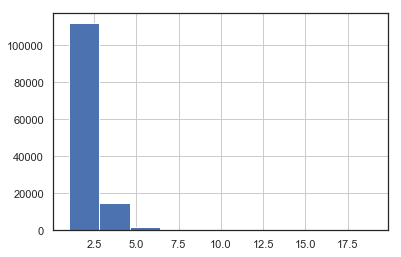

In [14]:
pop.groupby('cell_barcode').apply(lambda x: x['guide_identity'].count()).hist(bins=10)

In [15]:
pop.shape

(203941, 9)

In [16]:
pop['cell_barcode'].unique().shape

(128882,)

In [17]:

#total cells with valid guides
pop['cell_barcode'].unique().shape
pop.groupby('cell_barcode').apply(lambda x: x['guide_identity'].count()).value_counts()

(128882,)

1     79580
2     32444
3     11176
4      3686
5      1300
6       418
7       149
8        77
9        23
10       18
12        5
11        2
19        1
18        1
15        1
13        1
dtype: int64

pop.groupby('cell_barcode').apply(lambda x: x['guide_identity'].count())

In [18]:
captured_gbc_table.groupby('guide_identity').count().sort_values('cell_barcode')

,cell_barcode,read_count,UMI_count,coverage,gemgroup
guide_identity,,,,,
sgLH17063_2,8,8,8,8,8
sgLH01249_1,22,22,22,22,22
sgLH13860_2,140,140,140,140,140
sgLH11064_2,185,185,185,185,185
sgLH01249_2,203,203,203,203,203
sgLH08564_1,214,214,214,214,214
sgZC3H10_1,234,234,234,234,234
sgLH04660_2,240,240,240,240,240
sgLH11610_1,272,272,272,272,272
